<img src="https://github.com/jerrycatron/bitcoin_lstm/blob/main/Bitcoin_wallpaper.jpeg" width="1500" height="300/>

# Bitcoin Price Prediction Tutorial

### by Jake Catron
***

In this article I will be walking you through the process of using Long Short-Term Memory (LSTM) to predict the price of the cryptocurrency Bitcoin (BTC).


## What is Bitcoin?

Bitcoin is the world's most popular and valuable cryptocurrency. Considering my grandfather once asked me about it, it is likely that you have heard of it as well. But, you may still not understand what Bitcoin is under the hood. 

Wikipedia provides the following definition: "Bitcoin is a digital assest designed to work as a medium of exhange that uses **cryptography** to control its creation and management, rather than relying on central authorities."

## Crypto-what??

Before we dive into Bitcoin, let's first explore cryptography to understand the basis. "Cryptography" comes from the Greek word *kryptos* (secret) and *graphein* (to write). So it is the practice of writing secret messages. How does one accomplish this secrecy in the modern world? We use **encryption algorithms** to convert plaintext into unitelligible nonsense known as a **hash**. Think about the food kind of hash, it is a jumbled mixture of many ingredients. In the same sense, a encrpytion hash is a jumbled mixture of letters and numbers. The goal of all encryption algorithms is to increase the **computational time** required to convert the hashes created back into plain text. This is the key takeaway here. Modern encrpytion algorithms create complex hashes that take *enormous* amounts of computational time and electricity to map back to the original value. 

## Soo, what is Bitcoin?

Well Bitcoin is founded on a principle called the **block-chain**. Think of every block as a page in a book. The page contains a bunch of information that we can use to make conclusions about the other pages in the book, and it also has a unique number. This number only appears once in the entire book! Let's call the number the **nonce** ("number only used once"). So each page in the book has information on it as well as its own nonce that leads to the next page directly after it. 

If we wanted, we could call a book a *page-chain* (see what I did there?). But the difference between the block-chain and the page-chain is that in a block-chain, each block's nonce (page number) is unknown at first. Imagine instead of our pages containing words and sentences in our natural language, someone used an encryption algorithm to mix up everything into a secret mess(age) of letters and numbers! Essentially this is what happens to each block in the block-chain. The creator of Bitcoin (Satoshi Nakamoto) encrypted the phrase "The Times 03/Jan/2009 Chancellor on brink of second bailout for banks" into the hash "000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f". This along with a **nonce** of 2083236893 and some other information such as the **signature** and **public key** formed the very first block in the block-chain of Bitcoin. 

Instead of simply turning the page, for a new block to be added to the chain someone with a lot of brains and computational power has to increment the nonce until it hashes to a hex number with a certain amount of leading 0 bits (look at the hash of the first block above). Once that threshold of 0 bits is reached, the **miner** of the block is awarded a certain amount of coin for their efforts. Then this newly formed block passes on its solved hash to everyone in the network, so they can start mining the next block into existence. 

## Bitcoin's Controlled Supply

Bitcoin was designed in a way that the difficulty of mining a new block (achieving the correct nonce) is adjusted every 2016 blocks mined. The difficulty is adjusted so that the rate of mining is roughly 6 blocks per hour. This adjustment is to account for advancements in computing power and speed. 

Also, the amount of coins awarded to a successful miner is cut in half every time 210,000 new blocks are mined and added to the chain. However once the 32 halvings occur, the suppy supply of Bitcoin is finite and unchangeable. Since the intial block awarded 50 Bitcoin, it follows that Bitcoin's *supply curve* will stop once reaching to a value juuust under 21 million.

## Bitcoin as a Speculative Asset

Now you can atleast walk away from reading this knowing a bit more about the fundamentals of the famous Bitcoin. However the true purpose of this tutorial is to try to forecast the price of Bitcoin using hihg-frequency price and volume data. 

Why would we want to do that? Well since Bitcoin has gained popularity, it has transitioned from becoming just a currency to becoming an asset that investors can speculate the price of, hoping to turn a profit in a quick-turnaround. 

The extreme volatility of the price of Bitcoin as well as the fact that it is available to trade 24/7 as opposed to normal securities has made it the target of many hight-frequency traders.

While I believe wholeheartedly in the altruistic goal Nakamoto had in mind, I am also a greedy human. Thus I will be using historical pricing and volume data to try to predict the future! Sounds fancy right? 

***
**Note**: There are many other aspects of the block-chain which I did not touch on here, see [Satoshi's paper](https://bitcoin.org/bitcoin.pdf) for further reading.





## Methodology

When analyzing an asset such as Bitcoin, we want to use the knowledge we have of previous timeframes to make a decision about the upcoming ones.

So how will we accomplish this goal? By using deep learning. Every Data Scientist's favorite buzzword, deep learning decribes a subset of Machine Learning techniques that use deep neural networks to solve problems. Neural networks got their name after being structured similarly to the nuerons firing in our brains. Essentially think of each neuron taking in some data as input, performing a calculation/transformation on the data, and then passing it on to the rest of the neurons so they can collectively produce an output. 

We will use an LSTM model because after reviewing countless academic papers, they seemed to commonly have the highest prediction accuracy, as shown by this table from [4]

<img src="https://github.com/jerrycatron/bitcoin_lstm/blob/main/model_perf_table.png" alt="Table1"
	title="Model Comparison" width="15000" />

What is LSTM?

LSTM stands for Long Short-Term Memory. It is a type of Reccurent Neural Network (RNN). The thing with traditional neural nets is that they don't use the state/reasoning from an earlier layer to inform them about a later one. However RNN's suffer from short-term memory, as their gradient eventually dissipates or explodes during back-propagation. This is why LSTM is required, as it updates the cell's state using the culmination of the hidden state from previous cells. Thus a longer memory is produced.

If you want a more detailed explanation of the LSTM model, I suggest [this article](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Chrisopher Olah.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

## Collecting Data

In this tutorial we will be using high frequency (1-minute interval) price and volume data to forecast Bitcoin's price in minutes. The decision to use 1-minute interval closing price and volume data was based on a few factors.

First, I know that RNNs thrive on larger training data sets. Also, the start to end timeframe of writing this tutorial is less than a week. Thus instead of being able to manually scrape various APIs for real-time data and store it, I would have to rely on historical data, either from an API or a previously collected dataset. After investigating many of the APIs used in varous papers, it appeared they either did not have historical data going back more than a week from the current date, or it was blocked behind a paywall. So many of the features used by researchers were not available to me.

This meant I would have to try for a low-dimension approach. Based on the results from [3] which found that low-dimension (2 features), high-frequency (5-minute) data was slightly more accurate that high-dimension (15 features), low frequency (daily) data when using an LSTM model, so I opted to use a high frequency time interval and the LSTM model.

The only free source of 1-minute interval data I could find was from [Kaggle](https://www.kaggle.com/mczielinski/bitcoin-historical-data), where I was able to download Bitcoin's minutely OHLCV data from Jan 01, 2012 to March 31, 2021 as a csv file.

Let's load that data into a pandas DataFrame and take a look at the first and last 5 rows. 

In [4]:
# Loading DataFrame
btc_1min_df_og = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
# Displaying first and last 5 rows as well as column names
btc_1min_df_og

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Data Cleaning and Exploratory Analysis



So now that we have the data, let's clean it up a bit. 

We are going to drop the Open, High, Low, and Weighted_Price columns. The opening price of a minute is the same as the closing price of the previous minute, so there is no need to include both. But what we are interested in is the closing price, as that occurs at the end of each minute interval. So predicting the closing price gives us time to respond the the prediction if we were to implement a trading strategy. 

Let's also drop the "Volume\_(BTC)" column. This shows the amount of Bitcoin traded in that minute while the "Volume\_(Currency)" shows the amount traded, but in USD. Because the rest of the data is in USD, we are going to drop the BTC column so we have standard units.

Plus we're going to add a "Datetime" column because the current "Timestamp" is just in UNIX seconds. A standard UTC date and time will make it easier to visualize the *when* of our data. 

Because the size of the DataFrame is ~200mb I am going to perform the cleaning operations in place as much as I can, so as not to waste space creating multiple versions of mostly the same data.

In [5]:
# Adding Datetime column
btc_1min_df_og['Datetime'] = pd.to_datetime(btc_1min_df_og['Timestamp'], unit='s')
# Keeping relevant columns and renaming volume column
btc_1min_df = btc_1min_df_og.loc[:,['Datetime','Close', 'Volume_(Currency)']].rename(columns= {'Volume_(Currency)': 'Volume'})

btc_1min_df


,Datetime,Close,Volume
0,2011-12-31 07:52:00,4.39,2.000000
1,2011-12-31 07:53:00,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN
...,...,...,...
4857372,2021-03-30 23:56:00,58686.00,81259.372187
4857373,2021-03-30 23:57:00,58685.81,428158.146640
4857374,2021-03-30 23:58:00,58723.84,100117.070370
4857375,2021-03-30 23:59:00,58760.59,42332.958633


As you can see there are some missing values in the dataset. According to the author of the dataset, these value are missing if no transactions occurred on the exchange the data was scraped from during that minute interval. While in an ideal world we would have a dataset cross-referencing all cryptocurrency exchanges to fill in any missing minute intervals, for simplicity's sake we are going to forward fill the last observation. This actually makes sense given the circumstances because if no transactions occurred durign that time interval the price would remain the same. The missing volume values will be set to zero as no transactions were comleted at that time.

In [6]:
btc_1min_df.loc[:,'Close'] = btc_1min_df.loc[:,'Close'].fillna(method='ffill')
btc_1min_df.loc[:,'Volume'] = btc_1min_df.loc[:,'Volume'].fillna(value=0.0)

btc_1min_df

,Datetime,Close,Volume
0,2011-12-31 07:52:00,4.39,2.000000
1,2011-12-31 07:53:00,4.39,0.000000
2,2011-12-31 07:54:00,4.39,0.000000
3,2011-12-31 07:55:00,4.39,0.000000
4,2011-12-31 07:56:00,4.39,0.000000
...,...,...,...
4857372,2021-03-30 23:56:00,58686.00,81259.372187
4857373,2021-03-30 23:57:00,58685.81,428158.146640
4857374,2021-03-30 23:58:00,58723.84,100117.070370
4857375,2021-03-30 23:59:00,58760.59,42332.958633


Now that there are no gaps in our data, Let's look at a visualization of how the price changes over time to get a feel for our data.

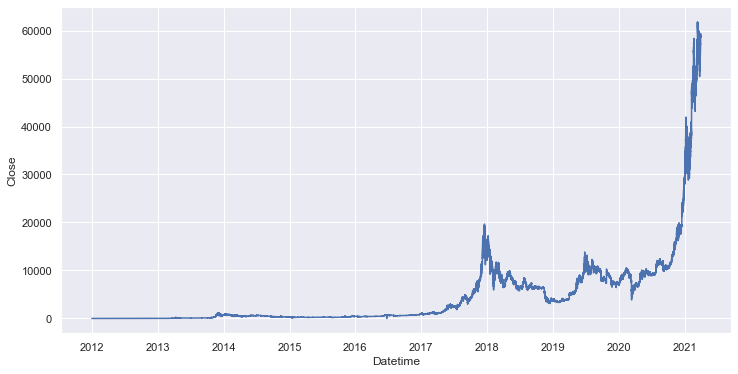

In [7]:
sns.set_theme()

plt.figure(figsize=(12,6))
sns.lineplot(data=btc_1min_df, x='Datetime', y='Close');


As we can see there has been some pretty extreme volatility and upward movement in Bitcoin's price throughout its years of existence. 2021 has been a particulary spectcular year, which may have to do with factors other than price and volatility. Because we are going to use the most recent prices as our test data, I want to include periods with as much volatility as I can. So we will be using data from June 2017 onwards for our model.

In [8]:
# Only keep observations from June 1, 2017 and onwards
start_cond = btc_1min_df.Datetime >= pd.Timestamp(2017,1,1) 
btc_1min_df = btc_1min_df.loc[start_cond,:]

# Resetting index to start from 0
btc_1min_df.reset_index(drop=True, inplace=True)


In [9]:
btc_1min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232001 entries, 0 to 2232000
Data columns (total 3 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Datetime  datetime64[ns]
 1   Close     float64       
 2   Volume    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 51.1 MB


In [10]:
btc_1min_df

,Datetime,Close,Volume
0,2017-01-01 00:00:00,966.30,0.000000
1,2017-01-01 00:01:00,966.34,7353.847400
2,2017-01-01 00:02:00,966.37,7814.876061
3,2017-01-01 00:03:00,966.37,0.000000
4,2017-01-01 00:04:00,966.37,0.000000
...,...,...,...
2231996,2021-03-30 23:56:00,58686.00,81259.372187
2231997,2021-03-30 23:57:00,58685.81,428158.146640
2231998,2021-03-30 23:58:00,58723.84,100117.070370
2231999,2021-03-30 23:59:00,58760.59,42332.958633


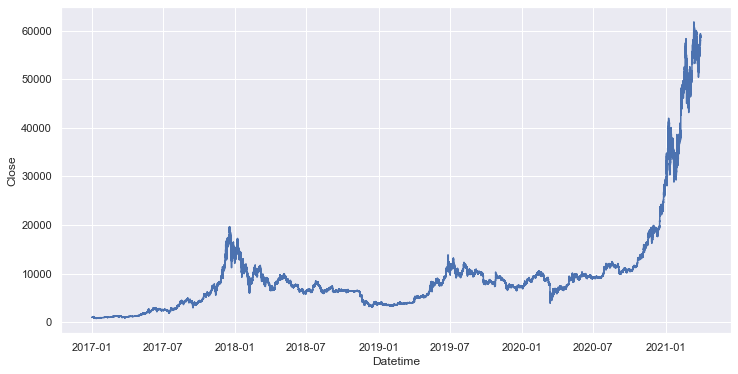

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(data=btc_1min_df, x='Datetime', y='Close');

We are going to be using a method called *cross-hold validation* by splitting the data set into subsets of training, validation, testing data. This is so that we can train our model doesn't fall captive to *overfitting*. Overfitting occurs when the loss function of our model minimizes itself so well on the training data that it creates an inaccurate prediction for anything other than the training data. So to avoid overfitting we will train our model on only 70% of the data.

However since we are going to train our model for multiple epochs, we don't want the results of our test data bleeding into our model as it trains. Thus, we validate that our model performs accurately by testing it on 20% of the remaining data.

Finally we reserve the last 10% of data for testing once our model has converged on a optimized loss value. This way we can judge the predictions it makes as being unbiased.

In [12]:
# Total number of rows in dataset
n = len(btc_1min_df)

# Using first 70% of observations for training our model
train_df = btc_1min_df[0:int(n*0.7)].drop('Datetime', 1)
# Using middle 20% for validation
val_df = btc_1min_df[int(n*0.7):int(n*0.9)].drop('Datetime', 1)
# Using last 10% of data to test our model
test_df = btc_1min_df[int(n*0.9):].drop('Datetime', 1)

# Attributes for later use
column_indices = {name: i for i, name in enumerate(train_df.columns)}

num_features = train_df.shape[1]
print('Number of features: ' + str(num_features))

train_df

Number of features: 2


,Close,Volume
0,966.30,0.000000
1,966.34,7353.847400
2,966.37,7814.876061
3,966.37,0.000000
4,966.37,0.000000
...,...,...
1562395,7138.63,1313.005210
1562396,7138.64,1780.504868
1562397,7140.77,9503.005247
1562398,7139.51,1563.014482


Now let's take a look at the distribution of our training data.

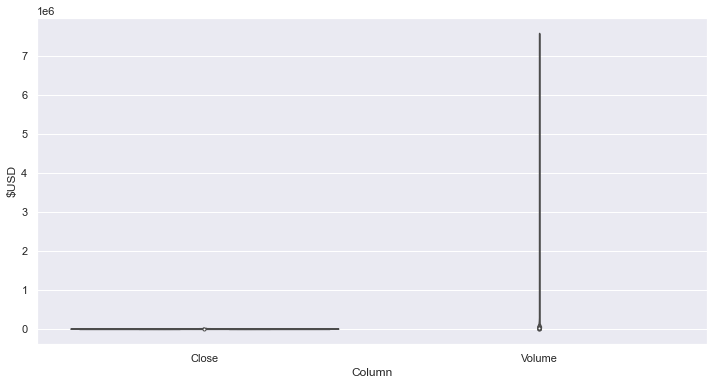

In [13]:
plt.figure(figsize=(12, 6))
melted = train_df
melted = melted.melt(var_name='Column', value_name='$USD')
ax = sns.violinplot(x='Column', y='$USD', data=melted)

As we can see there are some pretty drastic outliers in the data. We will use scikit-learn's Robust Scaler to deal with these. Then we will use the MinMaxScaler to reduce the range of values the model has to deal with

We will use sklearn's Pipeline feature to first fit the new scale of the data on the training set, and then rescaling the validation and test data sets using the scale of the training set.

In [14]:
estimators=[]

In [15]:
estimators.append(['robust',RobustScaler()])

In [16]:
estimators.append(['minmax',MinMaxScaler()])

In [17]:
scale=Pipeline(estimators,verbose=True)

In [18]:
train_df = pd.DataFrame(data=scale.fit_transform(train_df), columns=['Close', 'Volume'])


[Pipeline] ............ (step 1 of 2) Processing robust, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing minmax, total=   0.0s


In [19]:
val_df = pd.DataFrame(data=scale.transform(val_df), columns=['Close', 'Volume'])

In [20]:
test_df = pd.DataFrame(data=scale.transform(test_df), columns=['Close', 'Volume'])

In [21]:
test_df

,Close,Volume
0,0.651409,0.017097
1,0.651061,0.006879
2,0.650589,0.001599
3,0.651037,0.022611
4,0.651893,0.002131
...,...,...
223196,3.063067,0.010735
223197,3.063057,0.056564
223198,3.065068,0.013226
223199,3.067011,0.005593


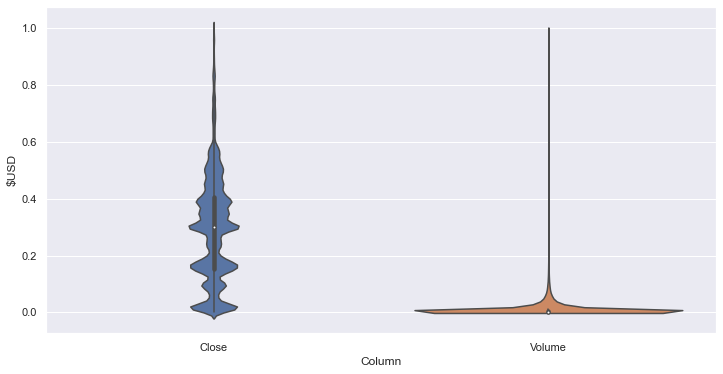

In [22]:
plt.figure(figsize=(12, 6))
melted = train_df
melted = melted.melt(var_name='Column', value_name='$USD')
ax = sns.violinplot(x='Column', y='$USD', data=melted)

This is definitely an improvement over the unstandardized graph. 

Now, before we can train our model, we need to divide our datasets into appropriate windows. Since we are going to use Tensorflow's Keras module to compile and fit our LSTM model, the code for the remainder of the tutorial we will be directly referencing the [TensorFlow documentation](https://www.tensorflow.org/tutorials/structured_data/time_series#data_windowing) to construct data structures that are efficient for use in TensorFlow.

In [23]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [24]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [25]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      batch_size=64)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [26]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

## Single Step Models

The first LSTM model we will look at is the one you see in many articles already. A **single step** model only predicts... you guessed it.. the very next time interval. So in our case it will predict the closing price of Bitcoin in the next minute based on what it has learned from the training dataset.

Let's first establish a "Baseline" model, where it simply predicts the next closing price using the previous one. No learning or fancy analysis required. This will give us something to compare our model's results with.

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


Because using an input window of size 1 would be trivial for this baseline (basically an identity function), we are going to use a window of size 10 to give a more interesting result.


In [ ]:
wide_window = WindowGenerator(
    input_width=10, label_width=10, shift=1,
    label_columns=['Close'])


In [ ]:
baseline = Baseline(label_index=column_indices['Close'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])


val_performance = {}
performance = {}
val_performance['SS_Baseline'] = baseline.evaluate(wide_window.val)
performance['SS_Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

Now we define a function that will compile and fit our variations of LSTM model. The **epochs** is the number of times that the model will iterate over the training data. I've set it at 20 to keep computational costs down. The **patience** monitors the loss on our validation set. If it doesn't decrease for the specified number of epochs, then the training is halted and the weights from the epoch with the best value will be returned.

In [27]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=3):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(20, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)
val_performance['SS_LSTM'] = lstm_model.evaluate(wide_window.val)
performance['SS_LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()



## Multi-Step Models

Now the results of the single-step model might look pretty good, but *beware*. This is a common fallacy of RNNs. Essentialy since the model is only predicting one step out, after every prediction the network is fed what the true price was. So because it is *recurrent* it updates it's state with the true value included, and then minimizes based on that value for the next prediciton.

Thus any single-step RNN is an overly complicated Auto-regressive (AR) model. While AR models are popular and useful for time-series forecasting, they aren't very practical for predicting a speculative asset such as Bitcoin. Thus we will now implement a **multi-step** LSTM, using the previous 10 minutes to predict the next 5. This was found to be the optimal proportion in [5].

In [28]:
OUT_STEPS = 5

multi_window = WindowGenerator(input_width=10,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)
multi_window

Total window size: 15
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10 11 12 13 14]
Label column name(s): None

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)


Now that we have a baseline, let's first do a normal multi-step LSTM.

In [29]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(20, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


Epoch 1/20
24413/24413 [==============================] - 428s 17ms/step - loss: 1.5377e-04 - mean_absolute_error: 0.0056 - val_loss: 0.0092 - val_mean_absolute_error: 0.0607
Epoch 2/20
24413/24413 [==============================] - 415s 17ms/step - loss: 1.5751e-04 - mean_absolute_error: 0.0051 - val_loss: 0.0067 - val_mean_absolute_error: 0.0522
Epoch 3/20
 5991/24413 [======>.......................] - ETA: 5:41 - loss: 7.0446e-05 - mean_absolute_error: 0.0022ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/Users/jakesmacbook/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-00b4e5a43657>", line 12, in <module>
    history = compile_and_fit(multi_lstm_model, multi_window)
  File "<ipython-input-27-6c2ec207c422>", line 13, in compile_and_fit
    history = 

In [ ]:
multi_val_performance['MS_LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['MS_LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

For this multi-step LSTM I am experimenting a bit with a *deep neural network*. Notice that there are now three LSTM layers. The first two layers have `return_sequences` set to true so that they can pass on their outputs to the next hidden layer. I am also using the `relu` activation function, as they did in [4]. Let's see if it pays off!

In [29]:
multi_lstm_model_deep = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=10, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(units=5, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(units=5, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model_deep, multi_window)

Epoch 1/20
24413/24413 [==============================] - 314s 13ms/step - loss: 2.7046e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0106 - val_mean_absolute_error: 0.0650
Epoch 2/20
24413/24413 [==============================] - 356s 15ms/step - loss: 3.2886e-04 - mean_absolute_error: 0.0079 - val_loss: 0.0107 - val_mean_absolute_error: 0.0651
Epoch 3/20
24413/24413 [==============================] - 311s 13ms/step - loss: 3.3162e-04 - mean_absolute_error: 0.0079 - val_loss: 0.0107 - val_mean_absolute_error: 0.0651
Epoch 4/20
24413/24413 [==============================] - 307s 13ms/step - loss: 3.3162e-04 - mean_absolute_error: 0.0079 - val_loss: 0.0107 - val_mean_absolute_error: 0.0651


In [ ]:

multi_val_performance['MSD_LSTM'] = multi_lstm_model_deep.evaluate(multi_window.val)
multi_performance['MSD_LSTM'] = multi_lstm_model_deep.evaluate(multi_window.test, verbose=0)


In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

## Conclusion

So we can see that there is great potential for the LSTM model to predict Bitcoin prices. The model outlined today is barely scratchign the surface. In the future, implementing more features such as Twitter sentiment analysis, technical indicators of correlated commodity assets such as gold, as well as Blockchain mining metrics will be included. I could use a classification model to optimize feature selection from these. There is also much optimization to be done within the LSTM model as well. The batch size, number of epochs, activation function, and especially the loss function could all be further customized.

I hope that you enjoyed this introduction to Bitcoin and the process of predicting it. I certainly had fun diving head first into deep learning, and only regret the lack of sleep greatly :'(


## References

[1] Nakamoto, Satoshi ; *Bitcoin A Peer-to-Peer Electronic Cash System*, [2008](https://bitcoin.org/bitcoin.pdf)

[2] Olah, Chistopher ; *Understanding LSTM Networks*, [2015](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

[3] Chen, Zheshi et al. ; *Bitcoin price prediction using machine learning: An approach to sample dimension engineering* [2020](https://www.sciencedirect.com/science/article/abs/pii/S037704271930398X?via%3Dihub)

[4] Jaquart, Patrick et al. ; *Short-term bitcoin market prediction via machine learning* [2021](https://www.sciencedirect.com/science/article/pii/S2405918821000027?via%3Dihub)

[5] Yifan Yao et al. ; *Combination of window-sliding and prediction range method based on LSTM model for predicting cryptocurrency* [2021](https://arxiv.org/ftp/arxiv/papers/2102/2102.05448.pdf)